# Low Noise Models - Data Overview  - FinalPlot

In [1]:
from obspy import * 
from pandas import *
from os import listdir
from scipy.stats import median_absolute_deviation as mad

import netCDF4 as nc
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
def __cut_frequencies_dataframe(df_psd, fmin, fmax):
    ind = []
    for i,f in enumerate(df_psd['frequencies']):
        if f >= fmin and f <= fmax:
            ind.append(i)

    df = df_psd.iloc[ind[0]:ind[-1],:]

    return df

In [3]:
def __conversion(data, informat=None, outformat=None):
    '''
    data:                  array 
    informat/outformat:    ASD, PSD, DB
    '''
    from numpy import log10, sqrt
    
    
    if informat == 'ASD' and outformat == 'PSD':
        return data**2
    
    elif informat == 'PSD' and outformat == 'ASD':
        return sqrt(data)

    elif informat == 'ASD' and outformat == 'DB':
        return 10*log10(data)
    
    elif informat == 'PSD' and outformat == 'DB':
        return 10*log10(data)
    
    elif informat == 'DB' and outformat == 'PSD':
        return 10**(data/10)
    
    elif informat == 'DB' and outformat == 'ASD':
        return sqrt(10**(data/10))
    
    else:
        print(" -> specified case not defined!")

## Configurations

In [4]:
config = {}

config['workdir'] = "/import/kilauea-data/LNM/data/FINAL/"

config['outpath_figures'] = config['workdir']+"../../figures_final/"


### Load RLNM Theory

In [5]:
rlnm = read_csv(config['workdir']+"rlnm_theory.csv")

periods = rlnm['period']
rlnm_psd = rlnm['rlnm_psd_median']
rlnm_psd_max = rlnm['rlnm_psd_maximum']
rlnm_upper_psd = rlnm['rlnm_psd_upper']
rlnm_lower_psd = rlnm['rlnm_psd_lower']

In [6]:
rlnm_db       = __conversion(rlnm_psd, informat='PSD', outformat='DB')
rlnm_upper_db = __conversion(rlnm_upper_psd, informat='PSD', outformat='DB')
rlnm_lower_db = __conversion(rlnm_lower_psd, informat='PSD', outformat='DB')

### RLAS Data

In [7]:
rlas = read_pickle(config['workdir']+"run_2019_RLAS-Z_3600_hours_stats_mod.pkl")

In [8]:
rlas_select = read_pickle(config['workdir']+"2019_RLAS-Z_hours_select_stats.pkl")

### Load ROMY

In [9]:
romy_z = read_pickle(config['workdir']+"run_2019_ROMY-Z_3600_hours_stats_mod.pkl")

In [10]:
romy_z_select = read_pickle(config['workdir']+"2019_ROMY-Z_hours_select_stats.pkl")

In [11]:
# romy_u = read_pickle(config['workdir']+"2019_ROMY-U_hours_stats.pkl")
# romy_v = read_pickle(config['workdir']+"2019_ROMY-V_hours_stats.pkl")
# romy_w = read_pickle(config['workdir']+"2019_ROMY-W_hours_stats.pkl")

### Load PFO Data

Frequency range that is used for array-derived rotation computations for this array:

- apterture: h = 730 m 
- velocity:  c = 3800 m/s

Poppeliers & Evans (2015):  $ \frac{0.03 c}{h} < f <  \frac{ 0.25 c}{ h}$

Donner et al. 2017:  $\frac{0.00238 c}{h} < f < \frac{0.25 c}{h}$


In [12]:
data_pfo_N = "run_2019_RPFO-N_3600_stats_mod.pkl"
data_pfo_E = "run_2019_RPFO-E_3600_stats_mod.pkl"
data_pfo_Z = "run_2019_RPFO-Z_3600_stats_mod.pkl"

PFO_N = read_pickle(config['workdir']+data_pfo_N)
PFO_E = read_pickle(config['workdir']+data_pfo_E)
PFO_Z = read_pickle(config['workdir']+data_pfo_Z)

fmin, fmax = 1/50, 1.0
PFO_N_all = __cut_frequencies_dataframe(PFO_N, fmin, fmax)
PFO_E_all = __cut_frequencies_dataframe(PFO_E, fmin, fmax)
PFO_Z_all = __cut_frequencies_dataframe(PFO_Z, fmin, fmax)

fmin, fmax = 0.00238*3800/730, 0.25*3800/730
PFO_N = __cut_frequencies_dataframe(PFO_N_all, fmin, fmax)
PFO_E = __cut_frequencies_dataframe(PFO_E_all, fmin, fmax)
PFO_Z = __cut_frequencies_dataframe(PFO_Z_all, fmin, fmax)

### Load GRF ADR

Frequency range that is used for array-derived rotation computations for this array:

- apterture: h = 17 852 m 
- velocity:  c = 3800 m/s

Poppeliers & Evans (2015):  $ \frac{0.03 c}{h} < f <  \frac{ 0.25 c}{ h}$


In [13]:
GRF_array = "GRF"

data_grf_N = f"run_2019_RGRF-N_3600_{GRF_array}_stats_mod.pkl"
data_grf_E = f"run_2019_RGRF-E_3600_{GRF_array}_stats_mod.pkl"
data_grf_Z = f"run_2019_RGRF-Z_3600_{GRF_array}_stats_mod.pkl"

GRF_N_all = read_pickle(config['workdir']+data_grf_N)
GRF_E_all = read_pickle(config['workdir']+data_grf_E)
GRF_Z_all = read_pickle(config['workdir']+data_grf_Z)

fmin, fmax = 0.03*3800/17851, 0.25*3800/17851
GRF_N = __cut_frequencies_dataframe(GRF_N_all, fmin, fmax)
GRF_E = __cut_frequencies_dataframe(GRF_E_all, fmin, fmax)
GRF_Z = __cut_frequencies_dataframe(GRF_Z_all, fmin, fmax)

### Load ROMY ADR 2019

Frequency range that is used for array-derived rotation computations for this array:

- apterture: h = 2628 m 
- velocity:  c = 3400 m/s

Poppeliers & Evans (2015):  $ \frac{0.03 c}{h} < f <  \frac{ 0.25 c}{ h}$


In [14]:
subarray = "optimal" ## all | inner | optimal

RMY_Z = read_pickle(config['workdir']+f"run_2019_ROMY_ADR-Z_3600_{subarray}_stats_mod.pkl")
RMY_N = read_pickle(config['workdir']+f"run_2019_ROMY_ADR-N_3600_{subarray}_stats_mod.pkl")
RMY_E = read_pickle(config['workdir']+f"run_2019_ROMY_ADR-E_3600_{subarray}_stats_mod.pkl")

## cut at 40 seconds
RMY_Z_all = RMY_Z[RMY_Z['frequencies'] > 1/40]
RMY_N_all = RMY_N[RMY_N['frequencies'] > 1/40]
RMY_E_all = RMY_E[RMY_E['frequencies'] > 1/40]

fmin, fmax = 0.03*3400/2628, 0.25*3400/2628
RMY_N = __cut_frequencies_dataframe(RMY_N_all, fmin, fmax)
RMY_E = __cut_frequencies_dataframe(RMY_E_all, fmin, fmax)
RMY_Z = __cut_frequencies_dataframe(RMY_Z_all, fmin, fmax)

In [15]:
subarray = "inner" ## all | inner | optimal

RMY_Z_i = read_pickle(config['workdir']+f"run_2019_ROMY_ADR-Z_3600_{subarray}_stats_mod.pkl")
RMY_N_i = read_pickle(config['workdir']+f"run_2019_ROMY_ADR-N_3600_{subarray}_stats_mod.pkl")
RMY_E_i = read_pickle(config['workdir']+f"run_2019_ROMY_ADR-E_3600_{subarray}_stats_mod.pkl")

## cut at 40 seconds
RMY_Z_i_all = RMY_Z_i[RMY_Z_i['frequencies'] > 1/40]
RMY_N_i_all = RMY_N_i[RMY_N_i['frequencies'] > 1/40]
RMY_E_i_all = RMY_E_i[RMY_E_i['frequencies'] > 1/40]

fmin, fmax = 0.02*3400/230, 0.25*3400/230
RMY_N_i = __cut_frequencies_dataframe(RMY_N_i_all, fmin, fmax)
RMY_E_i = __cut_frequencies_dataframe(RMY_E_i_all, fmin, fmax)
RMY_Z_i = __cut_frequencies_dataframe(RMY_Z_i_all, fmin, fmax)

### Load Single Station Model

In [16]:
ssm = read_pickle(config['workdir']+"station_2019_derived_rlnm.pkl")

## cutoff first samples
ssm = ssm.iloc[:-10,:]

ssm['frequencies'] = 1/ssm['period']

fmin, fmax = 1/200, 3.0
ssm = __cut_frequencies_dataframe(ssm, fmin, fmax)

ssm_period = ssm['period']
ssm_median_psd = ssm['median']
ssm_minimal_psd = ssm['minimal']

ssm_median_psd = __conversion(ssm['median'], informat="ASD", outformat="PSD")
ssm_minimal_psd = __conversion(ssm['minimal'], informat="ASD", outformat="PSD")

### Load ROMY-V 2022

In [17]:
# romy_v = read_pickle(config['workdir']+"STATS/"+"2022_ROMY-V_stats.pkl")

# romy_v_median_psd = romy_v['psds_median']
# romy_v_minimal_psd = romy_v['psds_minimal']

### Load Instruments Self-Noise

In [18]:
data= "~/Downloads/"

bs1c = read_csv(data+"BS1C.csv", names=['x','y'])
qrs  = read_csv(data+"QRS.csv", names=['x','y'])
bs3a  = read_csv(data+"BS3A.csv", names=['x','y'])
alfra  = read_csv(data+"ALFRA.csv", names=['x','y'])
brs  = read_csv(data+"BRS.csv", names=['x','y'])


bs3a['y2'] = (bs3a['x']*bs3a['y'])**2
bs1c['y2'] = (bs1c['x']*bs1c['y'])**2
qrs['y2'] = (qrs['x']*qrs['y'])**2
brs['y2'] = (brs['x']*brs['y'])**2
alfra['y2'] = (alfra['x']*alfra['y'])**2

### Load RLNM Distribution

In [19]:
import pickle

with open(config['workdir']+"RLNM_distribution.pkl",'rb') as f:
    output = pickle.load(f)

## Plot Overview - Median

In [20]:
def __plot_rlnm_overview():
    
    font = 14

    fig, ax = plt.subplots(2,2,figsize=(15,10), sharex=True, sharey=True)

    plt.subplots_adjust(wspace=0.05, hspace=0.08)
    
    ## add Frequency Axis
#     g = lambda x: 1/x
#     ax2 = ax.secondary_xaxis("top", functions=(g,g))
#     ax2.set_xlabel("Frequency in Hz", fontsize=font, labelpad=5)
#     ax2.set_xticklabels(1/periods, fontsize=11)
    

    ## PFO ADR data
    lim_n, lim_e, lim_z = 17, 17, 80
    ax[0,0].plot(1/PFO_N['frequencies'][lim_n:], PFO_N['median'][lim_n:],  color="darkgreen", zorder=2, label="PFO ADR-N 2019")
    ax[0,0].plot(1/PFO_E['frequencies'][lim_e:], PFO_E['median'][lim_e:], color="yellowgreen", zorder=2, label="PFO ADR-E 2019")
    ax[0,0].plot(1/PFO_Z['frequencies'][lim_z:], PFO_Z['median'][lim_z:], color="olive", zorder=2, label="PFO ADR-Z 2019")
    
    ax[0,0].plot(1/PFO_N['frequencies'][:lim_n], PFO_N['median'][:lim_n], ls="--", color="darkgreen", zorder=2)
    ax[0,0].plot(1/PFO_E['frequencies'][:lim_e], PFO_E['median'][:lim_e], ls="--", color="yellowgreen", zorder=2)
    ax[0,0].plot(1/PFO_Z['frequencies'][:lim_z], PFO_Z['median'][:lim_z], ls="--", color="olive", zorder=2)


    ## GRF ADR data
    lim_n, lim_e, lim_z = 13, 13, 40
    ax[1,0].plot(1/GRF_N['frequencies'][lim_n:], GRF_N['median'][lim_n:], color="sienna", zorder=2, label=f"{GRF_array} ADR-N 2019")
    ax[1,0].plot(1/GRF_E['frequencies'][lim_e:], GRF_E['median'][lim_e:], color="tan", zorder=2, label=f"{GRF_array} ADR-E 2019")
    ax[1,0].plot(1/GRF_Z['frequencies'][lim_z:], GRF_Z['median'][lim_z:], color="indianred", zorder=2, label=f"{GRF_array} ADR-Z 2019")
    
    ax[1,0].plot(1/GRF_N['frequencies'][:lim_n], GRF_N['median'][:lim_n], ls="--", color="sienna", zorder=2)
    ax[1,0].plot(1/GRF_E['frequencies'][:lim_e], GRF_E['median'][:lim_e], ls="--", color="tan", zorder=2)
    ax[1,0].plot(1/GRF_Z['frequencies'][:lim_z], GRF_Z['median'][:lim_z], ls="--", color="indianred", zorder=2)
    
    lim = 190
    ax[1,0].plot(1/GRF_N_all['frequencies'][:lim], GRF_N_all['median'][:lim], ls="-", color="sienna", zorder=1, alpha=0.5)
    ax[1,0].plot(1/GRF_E_all['frequencies'][:lim], GRF_E_all['median'][:lim], ls="-", color="tan", zorder=1, alpha=0.5)
    ax[1,0].plot(1/GRF_Z_all['frequencies'][:lim], GRF_Z_all['median'][:lim], ls="-", color="indianred", zorder=1, alpha=0.5)
        
    
    ## ROMY ADR data 2019
    lim_n, lim_e, lim_z = 15, 15, 80
    ax[0,1].plot(1/RMY_N['frequencies'][lim_n:], RMY_N['median'][lim_n:], color="darkcyan", zorder=2, label="ROMY ADR-N 2019")
    ax[0,1].plot(1/RMY_E['frequencies'][lim_e:], RMY_E['median'][lim_e:], color="skyblue", zorder=2, label="ROMY ADR-E 2019")
    ax[0,1].plot(1/RMY_Z['frequencies'][lim_z:], RMY_Z['median'][lim_z:], color="cadetblue", zorder=2, label="ROMY ADR-Z 2019")

    ax[0,1].plot(1/RMY_N['frequencies'][:lim_n], RMY_N['median'][:lim_n], ls="--", color="darkcyan", zorder=2)
    ax[0,1].plot(1/RMY_E['frequencies'][:lim_e], RMY_E['median'][:lim_e], ls="--", color="skyblue", zorder=2)
    ax[0,1].plot(1/RMY_Z['frequencies'][:lim_z], RMY_Z['median'][:lim_z], ls="--", color="cadetblue", zorder=2)
    
    ## ROMY ADR data 2019 -inner
    ax[0,1].plot(1/RMY_N_i['frequencies'], RMY_N_i['median'], color="darkcyan", zorder=2)
    ax[0,1].plot(1/RMY_E_i['frequencies'], RMY_E_i['median'], color="skyblue", zorder=2)
    ax[0,1].plot(1/RMY_Z_i['frequencies'], RMY_Z_i['median'], color="cadetblue", zorder=2)

    
    ## single stations model
    ax[1,1].plot(ssm['period'], ssm['median']**2, color="purple", zorder=2, label="Single-Stations 2019")    
    
    ax[1,1].fill_between(ssm['period'], ssm['perc_lower']**2, ssm['perc_upper']**2, color="purple", alpha=0.2, zorder=3)
    
    
    ## romy data
    ax[1,1].plot(1/romy_z['frequencies'], romy_z['median'], color="coral", ls="--", zorder=3, label="ROMY-Z 2019")
    ax[1,1].plot(1/romy_z_select['frequencies'], romy_z_select['psds_median'], color="darkorange", zorder=3, label="ROMY-Z 2019 select")
    
    ax[1,1].fill_between(1/romy_z['frequencies'], romy_z['perc_lower'], romy_z['perc_upper'], color="coral", alpha=0.2, zorder=3)

    
    ## romy others
#     plt.plot(1/romy_u['frequencies'], romy_u['psds_median'], color="pink", zorder=2, label="ROMY-U 2022")
#     plt.plot(1/romy_v['frequencies'], romy_v['psds_median'], color="hotpink", zorder=2, label="ROMY-V 2022")
#     plt.plot(1/romy_w['frequencies'], romy_w['psds_median'], color="orchid", zorder=2, label="ROMY-W 2022")
        
    ## rlas data
    ax[1,1].plot(1/rlas['frequencies'], rlas['median'], color="blue", ls="--", zorder=3, label="RLAS 2019")
    ax[1,1].plot(1/rlas_select['frequencies'], rlas_select['psds_median'], color="deepskyblue", zorder=3, label="RLAS 2019 select")
    
    ax[1,1].fill_between(1/rlas['frequencies'], rlas['perc_lower'], rlas['perc_upper'], color="blue", alpha=0.2, zorder=2)

    
    ## plotting basics ---------------------
    
    cmap = plt.cm.get_cmap('magma_r')
    cmap.set_under(color='white')
    
    ## theoretical rlnm
    y_axis = 10**(output['bin_mids']/10)
    x_axis = output['period']
    
    for i in range(2):
        for j in range(2):
            
#             ax[i,j].plot(periods, rlnm_psd, color="black", zorder=2, lw=2, label="RLNM")
            ax[i,j].plot(output['period'], 10**(output['bins_minimum']/10), color="black", zorder=2, lw=1.5, alpha=0.8, label="RLNM")
            
            im = ax[i,j].pcolor(x_axis, y_axis, output['dist'].T, cmap=cmap, vmin=1e-12, alpha=0.99)

            ax[i,j].set_xscale("log")
            ax[i,j].set_yscale("log")
            ax[i,j].set_xlim(1, 200)
            
            ax[i,j].set_ylim(8e-27, 5e-19)
    
            ax[i,j].grid(axis="both", which="both", ls="-", zorder=0, alpha=0.5)
            ax[i,j].legend(loc=3)    
            ax[i,j].tick_params(axis='both', labelsize=font-2)

#     plt.fill_betweenx(np.linspace(ymin,ymax,5), x1=0, x2=2.5, color="lightgrey", alpha=0.4, zorder=2)
#     plt.fill_betweenx(np.linspace(ymin-10,ymax+10,5), x1=100, x2=300, color="lightgrey", alpha=0.4, zorder=2)
    
    ## panel labels
    ax[0,0].text(.01, .99, 'a)', ha='left', va='top', transform=ax[0,0].transAxes, fontsize=font+2)
    ax[0,1].text(.01, .99, 'b)', ha='left', va='top', transform=ax[0,1].transAxes, fontsize=font+2)
    ax[1,0].text(.01, .99, 'c)', ha='left', va='top', transform=ax[1,0].transAxes, fontsize=font+2)
    ax[1,1].text(.01, .99, 'd)', ha='left', va='top', transform=ax[1,1].transAxes, fontsize=font+2)
                

    ax[1,0].set_xlabel("Period (s)", fontsize=font)
    ax[1,1].set_xlabel("Period (s)", fontsize=font)

    ax[0,0].set_ylabel(r"PSD ($rad^2$ /$s^2$ /Hz)",fontsize=font)
    ax[1,0].set_ylabel(r"PSD ($rad^2$ /$s^2$ /Hz)",fontsize=font)
    
    ## add colorbar
    cbar_ax = fig.add_axes([0.91, 0.125, 0.02, 0.755]) #[left, bottom, width, height]
    cb = plt.colorbar(im, cax=cbar_ax)    
    cb.set_label("Propability Density", fontsize=font, labelpad=-40, color="white")

    plt.show();
    return fig 

# fig = __plot_rlnm_overview()

In [21]:
# fig.savefig(config['outpath_figures']+"Overview_median_Final"+".png", fmt="png", bbox_inches="tight", dpi=300, transparent=None)

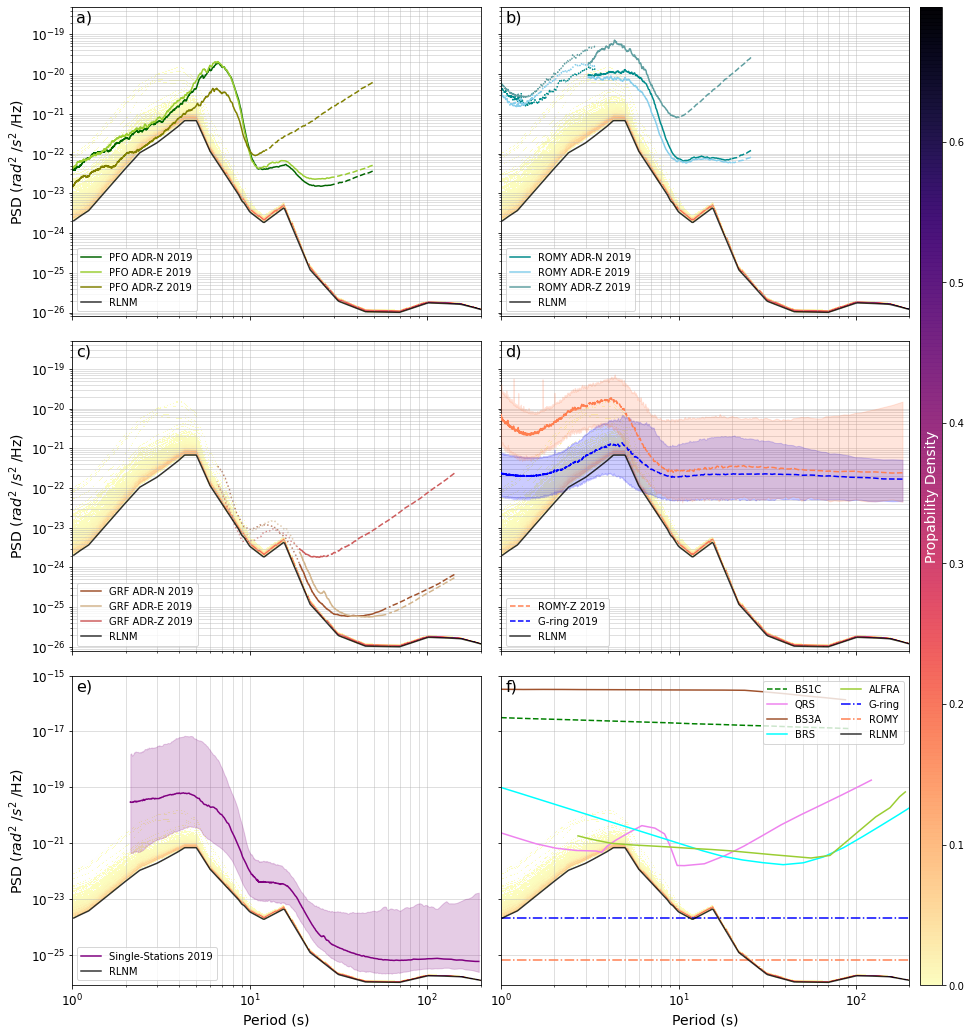

In [22]:
def __plot_rlnm_overview2():
    
    from numpy import pi, ones
    
    font = 14

    fig, ax = plt.subplots(3,2,figsize=(15,18), sharex=True, sharey=False)

    plt.subplots_adjust(wspace=0.05, hspace=0.08)
    
    ## add Frequency Axis
#     g = lambda x: 1/x
#     ax2 = ax.secondary_xaxis("top", functions=(g,g))
#     ax2.set_xlabel("Frequency in Hz", fontsize=font, labelpad=5)
#     ax2.set_xticklabels(1/periods, fontsize=11)
    

    ## PFO ADR data
    lim_n, lim_e, lim_z = 17, 17, 80
    ax[0,0].plot(1/PFO_N['frequencies'][lim_n:], PFO_N['median'][lim_n:],  color="darkgreen", zorder=2, label="PFO ADR-N 2019")
    ax[0,0].plot(1/PFO_E['frequencies'][lim_e:], PFO_E['median'][lim_e:], color="yellowgreen", zorder=2, label="PFO ADR-E 2019")
    ax[0,0].plot(1/PFO_Z['frequencies'][lim_z:], PFO_Z['median'][lim_z:], color="olive", zorder=2, label="PFO ADR-Z 2019")
    
    ax[0,0].plot(1/PFO_N['frequencies'][:lim_n], PFO_N['median'][:lim_n], ls="--", color="darkgreen", zorder=2)
    ax[0,0].plot(1/PFO_E['frequencies'][:lim_e], PFO_E['median'][:lim_e], ls="--", color="yellowgreen", zorder=2)
    ax[0,0].plot(1/PFO_Z['frequencies'][:lim_z], PFO_Z['median'][:lim_z], ls="--", color="olive", zorder=2)


    ## GRF ADR data
    lim_n, lim_e, lim_z = 13, 13, 40
    ax[1,0].plot(1/GRF_N['frequencies'][lim_n:], GRF_N['median'][lim_n:], color="sienna", zorder=2, label=f"{GRF_array} ADR-N 2019")
    ax[1,0].plot(1/GRF_E['frequencies'][lim_e:], GRF_E['median'][lim_e:], color="tan", zorder=2, label=f"{GRF_array} ADR-E 2019")
    ax[1,0].plot(1/GRF_Z['frequencies'][lim_z:], GRF_Z['median'][lim_z:], color="indianred", zorder=2, label=f"{GRF_array} ADR-Z 2019")
    
    ax[1,0].plot(1/GRF_N['frequencies'][:lim_n], GRF_N['median'][:lim_n], ls="--", color="sienna", zorder=2)
    ax[1,0].plot(1/GRF_E['frequencies'][:lim_e], GRF_E['median'][:lim_e], ls="--", color="tan", zorder=2)
    ax[1,0].plot(1/GRF_Z['frequencies'][:lim_z], GRF_Z['median'][:lim_z], ls="--", color="indianred", zorder=2)
    
    lim1, lim2 = 20, 190
    ax[1,0].plot(1/GRF_N_all['frequencies'][lim1:lim2], GRF_N_all['median'][lim1:lim2], ls=":", color="sienna", zorder=1, alpha=0.7)
    ax[1,0].plot(1/GRF_E_all['frequencies'][lim1:lim2], GRF_E_all['median'][lim1:lim2], ls=":", color="tan", zorder=1, alpha=0.7)
    ax[1,0].plot(1/GRF_Z_all['frequencies'][lim1:lim2], GRF_Z_all['median'][lim1:lim2], ls=":", color="indianred", zorder=1, alpha=0.7)
    
#     ax[1,0].plot(1/GRF_N['frequencies'][lim_n:], 1/(GRF_N['frequencies'][lim_n:])**2*1e-28)
#     ax[1,0].plot(1/GRF_N['frequencies'][lim_n:], 1/(GRF_N['frequencies'][lim_n:])**3*1e-28)
    
    ## ROMY ADR data 2019
    lim_n, lim_e, lim_z = 15, 15, 80
    ax[0,1].plot(1/RMY_N['frequencies'][lim_n:], RMY_N['median'][lim_n:], color="darkcyan", zorder=2, label="ROMY ADR-N 2019")
    ax[0,1].plot(1/RMY_E['frequencies'][lim_e:], RMY_E['median'][lim_e:], color="skyblue", zorder=2, label="ROMY ADR-E 2019")
    ax[0,1].plot(1/RMY_Z['frequencies'][lim_z:], RMY_Z['median'][lim_z:], color="cadetblue", zorder=2, label="ROMY ADR-Z 2019")

    ax[0,1].plot(1/RMY_N['frequencies'][:lim_n], RMY_N['median'][:lim_n], ls="--", color="darkcyan", zorder=2)
    ax[0,1].plot(1/RMY_E['frequencies'][:lim_e], RMY_E['median'][:lim_e], ls="--", color="skyblue", zorder=2)
    ax[0,1].plot(1/RMY_Z['frequencies'][:lim_z], RMY_Z['median'][:lim_z], ls="--", color="cadetblue", zorder=2)
    
    ## ROMY ADR data 2019 -inner
    ax[0,1].plot(1/RMY_N_i['frequencies'], RMY_N_i['median'], ls=":", color="darkcyan", zorder=2)
    ax[0,1].plot(1/RMY_E_i['frequencies'], RMY_E_i['median'], ls=":", color="skyblue", zorder=2)
    ax[0,1].plot(1/RMY_Z_i['frequencies'], RMY_Z_i['median'], ls=":", color="cadetblue", zorder=2)

    
    ## single stations model
    ax[2,0].plot(ssm['period'], ssm['median']**2, color="purple", zorder=2, label="Single-Stations 2019")    
    
    ax[2,0].fill_between(ssm['period'], ssm['perc_lower']**2, ssm['perc_upper']**2, color="purple", alpha=0.2, zorder=3)
    
    
    ## romy data
    ax[1,1].plot(1/romy_z['frequencies'], romy_z['median'], color="coral", ls="--", zorder=3, label="ROMY-Z 2019")
#     ax[1,1].plot(1/romy_z_select['frequencies'], romy_z_select['psds_median'], color="darkorange", zorder=3, label="ROMY-Z 2019 select")
    
    ax[1,1].fill_between(1/romy_z['frequencies'], romy_z['perc_lower'], romy_z['perc_upper'], color="coral", alpha=0.2, zorder=3)

    
    ## instruments self-noise
    ax[2,1].plot(1/bs1c['x'], bs1c['y2'], ls="--", label="BS1C", zorder=2, color="green")
    ax[2,1].plot(1/qrs['x'], qrs['y2'], label="QRS", zorder=2, color="violet")
    ax[2,1].plot(1/bs3a['x'], bs3a['y2'], label="BS3A", zorder=2, color="sienna")
    ax[2,1].plot(1/brs['x'], brs['y2'], label="BRS", zorder=2, color="aqua")
    ax[2,1].plot(1/alfra['x'], alfra['y2'], label="ALFRA", zorder=2, color="yellowgreen")

    e_rot = 2*pi/86400
    ax[2,1].plot([1, 200], ones(2)*(e_rot*2e-8)**2, color="blue", ls="-.", label="G-ring", zorder=2)
    ax[2,1].plot([1, 200], ones(2)*(6.2e-26), color="coral", ls="-.", label="ROMY", zorder=2)

    
    ## romy others
#     plt.plot(1/romy_u['frequencies'], romy_u['psds_median'], color="pink", zorder=2, label="ROMY-U 2022")
#     plt.plot(1/romy_v['frequencies'], romy_v['psds_median'], color="hotpink", zorder=2, label="ROMY-V 2022")
#     plt.plot(1/romy_w['frequencies'], romy_w['psds_median'], color="orchid", zorder=2, label="ROMY-W 2022")
        
    ## rlas data
    ax[1,1].plot(1/rlas['frequencies'], rlas['median'], color="blue", ls="--", zorder=3, label="G-ring 2019")
#     ax[1,1].plot(1/rlas_select['frequencies'], rlas_select['psds_median'], color="deepskyblue", zorder=3, label="G-ring 2019 select")
    
    ax[1,1].fill_between(1/rlas['frequencies'], rlas['perc_lower'], rlas['perc_upper'], color="blue", alpha=0.2, zorder=2)

    
    ## plotting basics ---------------------
    
    cmap = plt.cm.get_cmap('magma_r')
    cmap.set_under(color='white')
    
    ## theoretical rlnm
    y_axis = 10**(output['bin_mids']/10)
    x_axis = output['period']
    
    for i in range(3):
        for j in range(2):
            
#             ax[i,j].plot(periods, rlnm_psd, color="black", zorder=2, lw=2, label="RLNM")
            ax[i,j].plot(output['period'], 10**(output['bins_minimum']/10), color="black", zorder=2, lw=1.5, alpha=0.8, label="RLNM")
            
            im = ax[i,j].pcolor(x_axis, y_axis, output['dist'].T, cmap=cmap, vmin=1e-12, alpha=0.99)

            ax[i,j].set_xscale("log")
            ax[i,j].set_yscale("log")
            ax[i,j].set_xlim(1, 200)
            
#             ax[i,j].set_xlabel("Period (s)", fontsize=font)
#             ax[i,j].set_ylim(8e-27, 5e-19)
    
            ax[i,j].grid(axis="both", which="both", ls="-", zorder=0, alpha=0.5)
            ax[i,j].legend(loc=3)    
            ax[i,j].tick_params(axis='both', labelsize=font-2)

#     plt.fill_betweenx(np.linspace(ymin,ymax,5), x1=0, x2=2.5, color="lightgrey", alpha=0.4, zorder=2)
#     plt.fill_betweenx(np.linspace(ymin-10,ymax+10,5), x1=100, x2=300, color="lightgrey", alpha=0.4, zorder=2)

    ax[0,0].set_ylim(8e-27, 5e-19)
    ax[0,1].set_ylim(8e-27, 5e-19)
    ax[1,0].set_ylim(8e-27, 5e-19)
    ax[1,1].set_ylim(8e-27, 5e-19)
    ax[2,0].set_ylim(8e-27, 1e-15)
    ax[2,1].set_ylim(8e-27, 1e-15)
    
    ax[0,1].set_yticklabels([])
    ax[1,1].set_yticklabels([])
    ax[2,1].set_yticklabels([])

    ax[2,1].legend(loc=1, ncol=2)    

    
    ## panel labels
    ax[0,0].text(.01, .99, 'a)', ha='left', va='top', transform=ax[0,0].transAxes, fontsize=font+2)
    ax[0,1].text(.01, .99, 'b)', ha='left', va='top', transform=ax[0,1].transAxes, fontsize=font+2)
    ax[1,0].text(.01, .99, 'c)', ha='left', va='top', transform=ax[1,0].transAxes, fontsize=font+2)
    ax[1,1].text(.01, .99, 'd)', ha='left', va='top', transform=ax[1,1].transAxes, fontsize=font+2)
    ax[2,0].text(.01, .99, 'e)', ha='left', va='top', transform=ax[2,0].transAxes, fontsize=font+2)
    ax[2,1].text(.01, .99, 'f)', ha='left', va='top', transform=ax[2,1].transAxes, fontsize=font+2)
                

    ax[2,0].set_xlabel("Period (s)", fontsize=font)
    ax[2,1].set_xlabel("Period (s)", fontsize=font)

    ax[0,0].set_ylabel(r"PSD ($rad^2$ /$s^2$ /Hz)",fontsize=font)
    ax[1,0].set_ylabel(r"PSD ($rad^2$ /$s^2$ /Hz)",fontsize=font)
    ax[2,0].set_ylabel(r"PSD ($rad^2$ /$s^2$ /Hz)",fontsize=font)
    
    ## add colorbar
    cbar_ax = fig.add_axes([0.91, 0.125, 0.02, 0.755]) #[left, bottom, width, height]
    cb = plt.colorbar(im, cax=cbar_ax)    
    cb.set_label("Propability Density", fontsize=font, labelpad=-40, color="white")

    plt.show();
    return fig 

fig = __plot_rlnm_overview2()

In [23]:
fig.savefig(config['outpath_figures']+"Overview_median_Final_new"+".png", fmt="png", bbox_inches="tight", dpi=300, transparent=None)

In [24]:
## resolution romy
# (8e-6*632.8e-9*33.6/4/53.93)**2

## Minimals

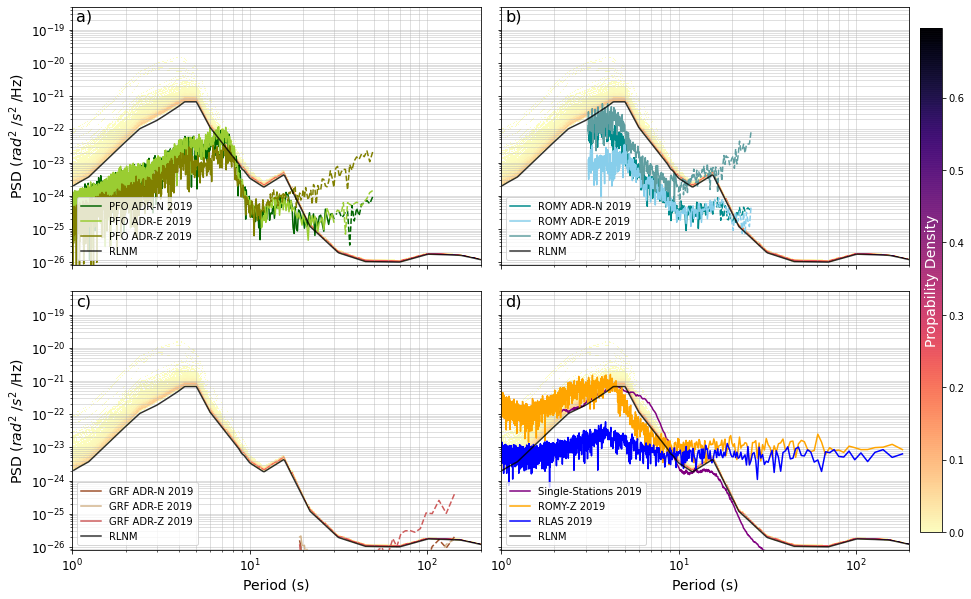

In [25]:
def __plot_rlnm_minimal_overview():
    
    font = 14

    fig, ax = plt.subplots(2,2,figsize=(15,10), sharex=True, sharey=True)

    plt.subplots_adjust(wspace=0.05, hspace=0.1)
    
    ## add Frequency Axis
#     g = lambda x: 1/x
#     ax2 = ax.secondary_xaxis("top", functions=(g,g))
#     ax2.set_xlabel("Frequency in Hz", fontsize=font, labelpad=5)
#     ax2.set_xticklabels(1/periods, fontsize=11)
        

    ## PFO ADR data
    lim_n, lim_e, lim_z = 17, 17, 80
    ax[0,0].plot(1/PFO_N['frequencies'][lim_n:], PFO_N['minimal'][lim_n:],  color="darkgreen", zorder=2, label="PFO ADR-N 2019")
    ax[0,0].plot(1/PFO_E['frequencies'][lim_e:], PFO_E['minimal'][lim_e:], color="yellowgreen", zorder=2, label="PFO ADR-E 2019")
    ax[0,0].plot(1/PFO_Z['frequencies'][lim_z:], PFO_Z['minimal'][lim_z:], color="olive", zorder=2, label="PFO ADR-Z 2019")
    
    ax[0,0].plot(1/PFO_N['frequencies'][:lim_n], PFO_N['minimal'][:lim_n], ls="--", color="darkgreen", zorder=2)
    ax[0,0].plot(1/PFO_E['frequencies'][:lim_e], PFO_E['minimal'][:lim_e], ls="--", color="yellowgreen", zorder=2)
    ax[0,0].plot(1/PFO_Z['frequencies'][:lim_z], PFO_Z['minimal'][:lim_z], ls="--", color="olive", zorder=2)
    
    ## GRF ADR data
    lim_n, lim_e, lim_z = 30, 30, 40
    ax[1,0].plot(1/GRF_N['frequencies'][lim_n:], GRF_N['minimal'][lim_n:], color="sienna", zorder=2, label=f"{GRF_array} ADR-N 2019")
    ax[1,0].plot(1/GRF_E['frequencies'][lim_e:], GRF_E['minimal'][lim_e:], color="tan", zorder=2, label=f"{GRF_array} ADR-E 2019")
    ax[1,0].plot(1/GRF_Z['frequencies'][lim_z:], GRF_Z['minimal'][lim_z:], color="indianred", zorder=2, label=f"{GRF_array} ADR-Z 2019")
    
    ax[1,0].plot(1/GRF_N['frequencies'][:lim_n], GRF_N['minimal'][:lim_n], ls="--", color="sienna", zorder=2)
    ax[1,0].plot(1/GRF_E['frequencies'][:lim_e], GRF_E['minimal'][:lim_e], ls="--", color="tan", zorder=2)
    ax[1,0].plot(1/GRF_Z['frequencies'][:lim_z], GRF_Z['minimal'][:lim_z], ls="--", color="indianred", zorder=2)
        
    ## ROMY ADR data 2019
    lim_n, lim_e, lim_z = 30, 30, 80
    ax[0,1].plot(1/RMY_N['frequencies'][lim_n:], RMY_N['minimal'][lim_n:], color="darkcyan", zorder=2, label="ROMY ADR-N 2019")
    ax[0,1].plot(1/RMY_E['frequencies'][lim_e:], RMY_E['minimal'][lim_e:], color="skyblue", zorder=2, label="ROMY ADR-E 2019")
    ax[0,1].plot(1/RMY_Z['frequencies'][lim_z:], RMY_Z['minimal'][lim_z:], color="cadetblue", zorder=2, label="ROMY ADR-Z 2019")

    ax[0,1].plot(1/RMY_N['frequencies'][:lim_n], RMY_N['minimal'][:lim_n], ls="--", color="darkcyan", zorder=2)
    ax[0,1].plot(1/RMY_E['frequencies'][:lim_e], RMY_E['minimal'][:lim_e], ls="--", color="skyblue", zorder=2)
    ax[0,1].plot(1/RMY_Z['frequencies'][:lim_z], RMY_Z['minimal'][:lim_z], ls="--", color="cadetblue", zorder=2)

    ## single stations model
    ax[1,1].plot(ssm_period, ssm_minimal_psd, color="purple", zorder=2, label="Single-Stations 2019")
    
    # romy data
    ax[1,1].plot(1/romy_z['frequencies'], romy_z['minimal'], color="orange", zorder=2, label="ROMY-Z 2019")
    

    # romy others
#     ax[1,1].plot(1/romy_u['frequencies'], romy_u['psds_minimal'], color="pink", zorder=2, label="ROMY-U 2022")
#     ax[1,1].plot(1/romy_v['frequencies'], romy_v['psds_minimal'], color="hotpink", zorder=2, label="ROMY-V 2022")
#     ax[1,1].plot(1/romy_w['frequencies'], romy_w['psds_minimal'], color="orchid", zorder=2, label="ROMY-W 2022")
        

    # rlas data
    ax[1,1].plot(1/rlas['frequencies'], rlas['minimal'], color="blue", zorder=2, label="RLAS 2019")


    ## plotting basics ---------------------
    
    cmap = plt.cm.get_cmap('magma_r')
    cmap.set_under(color='white')
    
    ## theoretical rlnm
    y_axis = 10**(output['bin_mids']/10)
    x_axis = output['period']
    
    for i in range(2):
        for j in range(2):
            
#             ax[i,j].plot(periods, rlnm_psd, color="black", zorder=2, lw=2, label="RLNM")
            ax[i,j].plot(output['period'], 10**(output['bins_minimum']/10), color="black", zorder=2, lw=1.5, alpha=0.8, label="RLNM")
            
            im = ax[i,j].pcolor(x_axis, y_axis, output['dist'].T, cmap=cmap, vmin=1e-12, alpha=0.99)

            ax[i,j].set_xscale("log")
            ax[i,j].set_yscale("log")
            ax[i,j].set_xlim(1, 200)
            
            ymin, ymax = 8e-27, 5e-19
            ax[i,j].set_ylim(ymin, ymax)
    
            ax[i,j].grid(axis="both", which="both", ls="-", zorder=0, alpha=0.5)
            ax[i,j].legend(loc=3)    
            ax[i,j].tick_params(axis='both', labelsize=font-2)

    
    ## add colorbar
    cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7]) #[left, bottom, width, height]
    cb = plt.colorbar(im, cax=cbar_ax)    
    cb.set_label("Propability Density", fontsize=font, labelpad=-40, color="white")

#     plt.fill_betweenx(np.linspace(ymin,ymax,5), x1=0, x2=2.5, color="lightgrey", alpha=0.4, zorder=2)
#     plt.fill_betweenx(np.linspace(ymin-10,ymax+10,5), x1=100, x2=300, color="lightgrey", alpha=0.4, zorder=2)

    ## panel labels
    ax[0,0].text(.01, .99, 'a)', ha='left', va='top', transform=ax[0,0].transAxes, fontsize=font+2)
    ax[0,1].text(.01, .99, 'b)', ha='left', va='top', transform=ax[0,1].transAxes, fontsize=font+2)
    ax[1,0].text(.01, .99, 'c)', ha='left', va='top', transform=ax[1,0].transAxes, fontsize=font+2)
    ax[1,1].text(.01, .99, 'd)', ha='left', va='top', transform=ax[1,1].transAxes, fontsize=font+2)
     
    ax[1,0].set_xlabel("Period (s)", fontsize=font)
    ax[1,1].set_xlabel("Period (s)", fontsize=font)

    ax[0,0].set_ylabel(r"PSD ($rad^2$ /$s^2$ /Hz)",fontsize=font)
    ax[1,0].set_ylabel(r"PSD ($rad^2$ /$s^2$ /Hz)",fontsize=font)

    plt.show();
    return fig 

fig = __plot_rlnm_minimal_overview()

In [26]:
# fig.savefig(config['outpath_figures']+"Overview_minimal_Final"+".png", fmt="png", bbox_inches="tight", dpi=300, transparent=None)

## Minimum

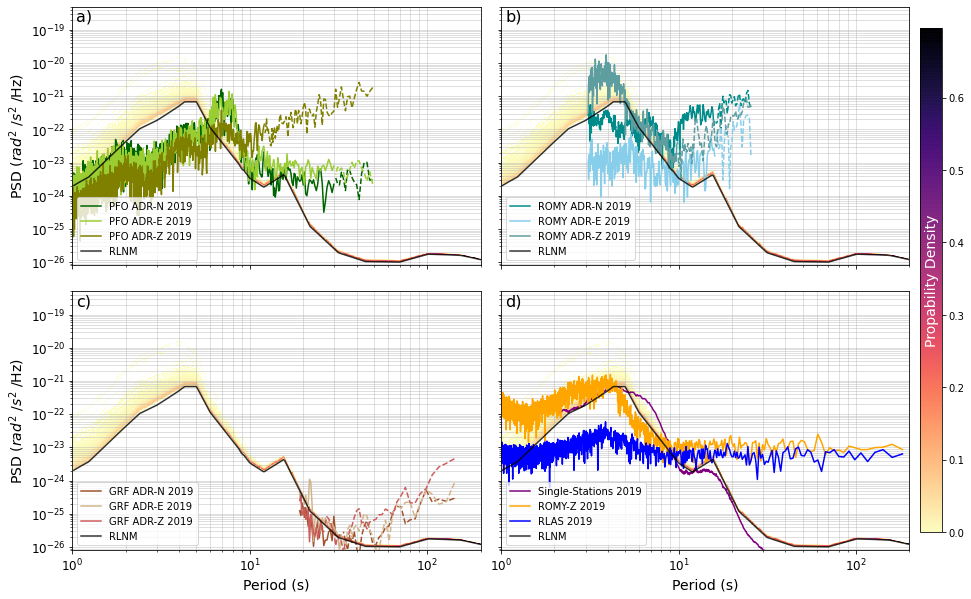

In [27]:
def __plot_rlnm_minimal_overview():
    
    font = 14

    fig, ax = plt.subplots(2,2,figsize=(15,10), sharex=True, sharey=True)

    plt.subplots_adjust(wspace=0.05, hspace=0.1)
    
    ## add Frequency Axis
#     g = lambda x: 1/x
#     ax2 = ax.secondary_xaxis("top", functions=(g,g))
#     ax2.set_xlabel("Frequency in Hz", fontsize=font, labelpad=5)
#     ax2.set_xticklabels(1/periods, fontsize=11)
        

    ## PFO ADR data
    lim_n, lim_e, lim_z = 17, 17, 80
    ax[0,0].plot(1/PFO_N['frequencies'][lim_n:], PFO_N['minimum'][lim_n:],  color="darkgreen", zorder=2, label="PFO ADR-N 2019")
    ax[0,0].plot(1/PFO_E['frequencies'][lim_e:], PFO_E['minimum'][lim_e:], color="yellowgreen", zorder=2, label="PFO ADR-E 2019")
    ax[0,0].plot(1/PFO_Z['frequencies'][lim_z:], PFO_Z['minimum'][lim_z:], color="olive", zorder=2, label="PFO ADR-Z 2019")
    
    ax[0,0].plot(1/PFO_N['frequencies'][:lim_n], PFO_N['minimum'][:lim_n], ls="--", color="darkgreen", zorder=2)
    ax[0,0].plot(1/PFO_E['frequencies'][:lim_e], PFO_E['minimum'][:lim_e], ls="--", color="yellowgreen", zorder=2)
    ax[0,0].plot(1/PFO_Z['frequencies'][:lim_z], PFO_Z['minimum'][:lim_z], ls="--", color="olive", zorder=2)
    
    ## GRF ADR data
    lim_n, lim_e, lim_z = 30, 30, 40
    ax[1,0].plot(1/GRF_N['frequencies'][lim_n:], GRF_N['minimum'][lim_n:], color="sienna", zorder=2, label=f"{GRF_array} ADR-N 2019")
    ax[1,0].plot(1/GRF_E['frequencies'][lim_e:], GRF_E['minimum'][lim_e:], color="tan", zorder=2, label=f"{GRF_array} ADR-E 2019")
    ax[1,0].plot(1/GRF_Z['frequencies'][lim_z:], GRF_Z['minimum'][lim_z:], color="indianred", zorder=2, label=f"{GRF_array} ADR-Z 2019")
    
    ax[1,0].plot(1/GRF_N['frequencies'][:lim_n], GRF_N['minimum'][:lim_n], ls="--", color="sienna", zorder=2)
    ax[1,0].plot(1/GRF_E['frequencies'][:lim_e], GRF_E['minimum'][:lim_e], ls="--", color="tan", zorder=2)
    ax[1,0].plot(1/GRF_Z['frequencies'][:lim_z], GRF_Z['minimum'][:lim_z], ls="--", color="indianred", zorder=2)
        
    ## ROMY ADR data 2019
    lim_n, lim_e, lim_z = 30, 30, 80
    ax[0,1].plot(1/RMY_N['frequencies'][lim_n:], RMY_N['minimum'][lim_n:], color="darkcyan", zorder=2, label="ROMY ADR-N 2019")
    ax[0,1].plot(1/RMY_E['frequencies'][lim_e:], RMY_E['minimum'][lim_e:], color="skyblue", zorder=2, label="ROMY ADR-E 2019")
    ax[0,1].plot(1/RMY_Z['frequencies'][lim_z:], RMY_Z['minimum'][lim_z:], color="cadetblue", zorder=2, label="ROMY ADR-Z 2019")

    ax[0,1].plot(1/RMY_N['frequencies'][:lim_n], RMY_N['minimum'][:lim_n], ls="--", color="darkcyan", zorder=2)
    ax[0,1].plot(1/RMY_E['frequencies'][:lim_e], RMY_E['minimum'][:lim_e], ls="--", color="skyblue", zorder=2)
    ax[0,1].plot(1/RMY_Z['frequencies'][:lim_z], RMY_Z['minimum'][:lim_z], ls="--", color="cadetblue", zorder=2)

    ## single stations model
    ax[1,1].plot(ssm_period, ssm_minimal_psd, color="purple", zorder=2, label="Single-Stations 2019")
    
    # romy data
    ax[1,1].plot(1/romy_z['frequencies'], romy_z['minimal'], color="orange", zorder=2, label="ROMY-Z 2019")
    

    # romy others
#     ax[1,1].plot(1/romy_u['frequencies'], romy_u['psds_minimal'], color="pink", zorder=2, label="ROMY-U 2022")
#     ax[1,1].plot(1/romy_v['frequencies'], romy_v['psds_minimal'], color="hotpink", zorder=2, label="ROMY-V 2022")
#     ax[1,1].plot(1/romy_w['frequencies'], romy_w['psds_minimal'], color="orchid", zorder=2, label="ROMY-W 2022")
        

    # rlas data
    ax[1,1].plot(1/rlas['frequencies'], rlas['minimal'], color="blue", zorder=2, label="RLAS 2019")


    ## plotting basics ---------------------
    
    cmap = plt.cm.get_cmap('magma_r')
    cmap.set_under(color='white')
    
    ## theoretical rlnm
    y_axis = 10**(output['bin_mids']/10)
    x_axis = output['period']
    
    for i in range(2):
        for j in range(2):
            
#             ax[i,j].plot(periods, rlnm_psd, color="black", zorder=2, lw=2, label="RLNM")
            ax[i,j].plot(output['period'], 10**(output['bins_minimum']/10), color="black", zorder=2, lw=1.5, alpha=0.8, label="RLNM")
            
            im = ax[i,j].pcolor(x_axis, y_axis, output['dist'].T, cmap=cmap, vmin=1e-12, alpha=0.99)

            ax[i,j].set_xscale("log")
            ax[i,j].set_yscale("log")
            ax[i,j].set_xlim(1, 200)
            
            ymin, ymax = 8e-27, 5e-19
            ax[i,j].set_ylim(ymin, ymax)
    
            ax[i,j].grid(axis="both", which="both", ls="-", zorder=0, alpha=0.5)
            ax[i,j].legend(loc=3)    
            ax[i,j].tick_params(axis='both', labelsize=font-2)

    
    ## add colorbar
    cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7]) #[left, bottom, width, height]
    cb = plt.colorbar(im, cax=cbar_ax)    
    cb.set_label("Propability Density", fontsize=font, labelpad=-40, color="white")

#     plt.fill_betweenx(np.linspace(ymin,ymax,5), x1=0, x2=2.5, color="lightgrey", alpha=0.4, zorder=2)
#     plt.fill_betweenx(np.linspace(ymin-10,ymax+10,5), x1=100, x2=300, color="lightgrey", alpha=0.4, zorder=2)

    ## panel labels
    ax[0,0].text(.01, .99, 'a)', ha='left', va='top', transform=ax[0,0].transAxes, fontsize=font+2)
    ax[0,1].text(.01, .99, 'b)', ha='left', va='top', transform=ax[0,1].transAxes, fontsize=font+2)
    ax[1,0].text(.01, .99, 'c)', ha='left', va='top', transform=ax[1,0].transAxes, fontsize=font+2)
    ax[1,1].text(.01, .99, 'd)', ha='left', va='top', transform=ax[1,1].transAxes, fontsize=font+2)
     
    ax[1,0].set_xlabel("Period (s)", fontsize=font)
    ax[1,1].set_xlabel("Period (s)", fontsize=font)

    ax[0,0].set_ylabel(r"PSD ($rad^2$ /$s^2$ /Hz)",fontsize=font)
    ax[1,0].set_ylabel(r"PSD ($rad^2$ /$s^2$ /Hz)",fontsize=font)

    plt.show();
    return fig 

fig = __plot_rlnm_minimal_overview()